In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from math import pi

In [2]:
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [3]:
data = pd.read_csv("pokemon_data/pokemon_data.csv")
data.head()

,Unnamed: 0,name,pokedex_number,status,type_number,type_1,type_2,height_m,weight_kg,total_points,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,이상해씨,1,노말,2,풀,독,0.7,6.9,318,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,이상해풀,2,노말,2,풀,독,1.0,13.0,405,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,이상해꽃,3,노말,2,풀,독,2.0,100.0,525,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,파이리,4,노말,1,불꽃,NaN,0.6,8.5,309,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,4,리자드,5,노말,1,불꽃,NaN,1.1,19.0,405,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [4]:
data.drop(['Unnamed: 0', 'status', 'type_number', 'type_2','against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'], axis=1, inplace=True)
data.head()

,name,pokedex_number,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,이상해씨,1,풀,0.7,6.9,318,45,49,49,65,65,45
1,이상해풀,2,풀,1.0,13.0,405,60,62,63,80,80,60
2,이상해꽃,3,풀,2.0,100.0,525,80,82,83,100,100,80
3,파이리,4,불꽃,0.6,8.5,309,39,52,43,60,50,65
4,리자드,5,불꽃,1.1,19.0,405,58,64,58,80,65,80


In [5]:
abilities = data.iloc[:, 3:]
abilities

,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,0.7,6.9,318,45,49,49,65,65,45
1,1.0,13.0,405,60,62,63,80,80,60
2,2.0,100.0,525,80,82,83,100,100,80
3,0.6,8.5,309,39,52,43,60,50,65
4,1.1,19.0,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
146,1.8,3.3,300,41,64,45,50,50,50
147,4.0,16.5,420,61,84,65,70,70,70
148,2.2,210.0,600,91,134,95,100,100,80
149,2.0,122.0,680,106,110,90,154,90,130


In [6]:
scaler = MinMaxScaler(feature_range=(0, 100))

In [7]:
for col in abilities.columns:
    score = scaler.fit_transform(abilities[[col]])
    data[col] = score
data.head()

,name,pokedex_number,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,이상해씨,1,풀,5.813953,1.478582,25.360825,14.583333,34.108527,25.142857,35.971223,42.857143,22.222222
1,이상해풀,2,풀,9.302326,2.804958,43.298969,20.833333,44.186047,33.142857,46.762590,57.142857,33.333333
2,이상해꽃,3,풀,20.930233,21.722114,68.041237,29.166667,59.689922,44.571429,61.151079,76.190476,48.148148
3,파이리,4,불꽃,4.651163,1.826484,23.505155,12.083333,36.434109,21.714286,32.374101,28.571429,37.037037
4,리자드,5,불꽃,10.465116,4.109589,43.298969,20.000000,45.736434,30.285714,46.762590,42.857143,48.148148


In [8]:
data[data["name"] == "롱스톤"]

,name,pokedex_number,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
94,롱스톤,95,바위,100.0,45.640357,39.175258,10.416667,31.007752,88.571429,10.791367,23.809524,40.740741


In [9]:
data[data["name"] == "잠만보"]

,name,pokedex_number,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
142,잠만보,143,노말,22.093023,100.0,71.134021,62.5,81.395349,34.285714,35.971223,85.714286,11.111111


In [10]:
points = {'height_m':'키(m)', 'weight_kg':'몸무게(kg)', 'total_points':'총 능력치', 'hp':'HP', 'attack':'공격력', 'defense':'방어력',
          'sp_attack':'특수 공격력',  'sp_defense':'특수 방어력', 'speed':'민첩성'}
typeColor = {'격투':'#C22E28','고스트':'#735797','노말':'#A8A77A','독':'#A33EA1','드래곤':'#6F35FC','땅':'#E2BF65','물':'#6390F0',
        '바위':'#B6A136','벌레':'#A6B91A','불꽃':'#EE8130','얼음':'#96D9D6','에스퍼':'#F95587','전기':'#F7D02C','페어리':'#D685AD',
        '풀':'#7AC74C'}
typeList = data['type_1']

In [11]:
def translationCate(x):
    return points[x]

In [12]:
def make_spider( row, title, color):

    # number of variable
    categories=list(map(translationCate, list(data)[3:]))
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,20,40,60,80,100], ["0","20","40","60","80","100"], color="grey", size=10)
    plt.ylim(0,100)
    
    ax.tick_params(axis='both', which='major', pad=20)

    # Ind1
    values=data.loc[row].drop(['name', 'pokedex_number', 'type_1']).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, color=color,y = 1.1, fontsize=14)
    
#     plt.savefig('./imgs/포켓몬별_통계/'+str(row+1)+'_'+title+'.png')
    plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


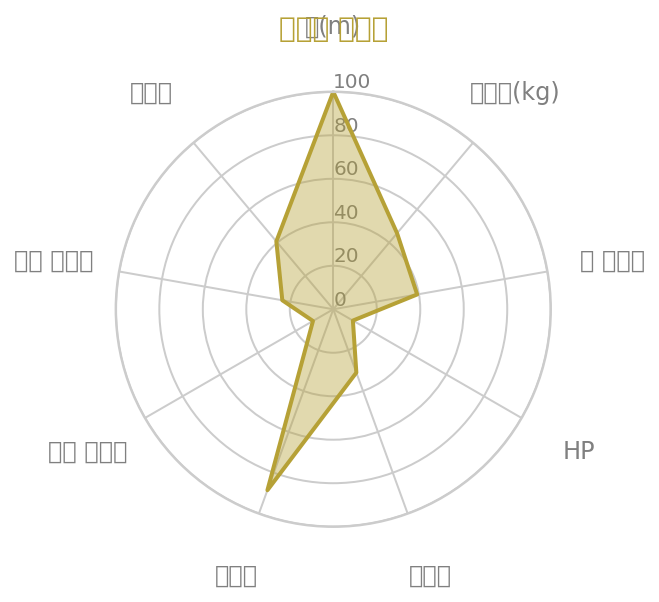

In [13]:
make_spider(94, title= data['name'][94]+' 능력치', color=typeColor[typeList[94]])

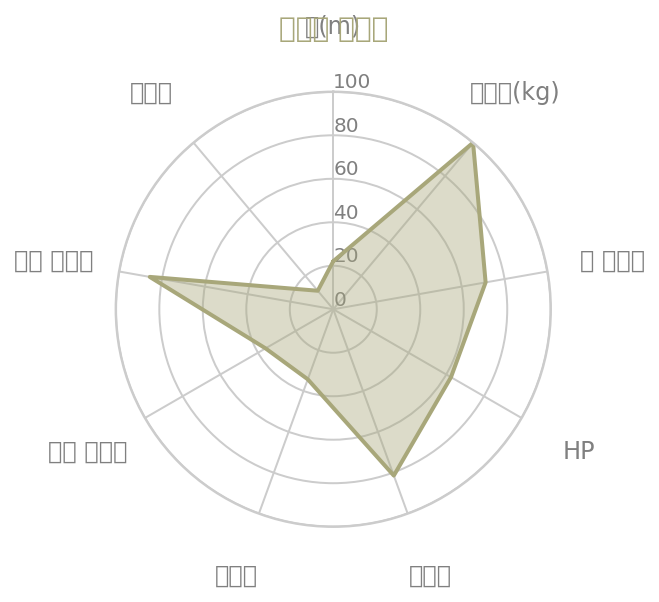

In [14]:
make_spider(142, title= data['name'][142]+' 능력치', color=typeColor[typeList[142]])

In [15]:
data.head()

,name,pokedex_number,type_1,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,이상해씨,1,풀,5.813953,1.478582,25.360825,14.583333,34.108527,25.142857,35.971223,42.857143,22.222222
1,이상해풀,2,풀,9.302326,2.804958,43.298969,20.833333,44.186047,33.142857,46.762590,57.142857,33.333333
2,이상해꽃,3,풀,20.930233,21.722114,68.041237,29.166667,59.689922,44.571429,61.151079,76.190476,48.148148
3,파이리,4,불꽃,4.651163,1.826484,23.505155,12.083333,36.434109,21.714286,32.374101,28.571429,37.037037
4,리자드,5,불꽃,10.465116,4.109589,43.298969,20.000000,45.736434,30.285714,46.762590,42.857143,48.148148


In [17]:
data.columns = ['name', 'id', 'typeOne', 'height', 'weight',
       'totalPoints', 'hp', 'attack', 'defense', 'spAttack', 'spDefense',
       'speed']
data.head()

,name,id,typeOne,height,weight,totalPoints,hp,attack,defense,spAttack,spDefense,speed
0,이상해씨,1,풀,5.813953,1.478582,25.360825,14.583333,34.108527,25.142857,35.971223,42.857143,22.222222
1,이상해풀,2,풀,9.302326,2.804958,43.298969,20.833333,44.186047,33.142857,46.762590,57.142857,33.333333
2,이상해꽃,3,풀,20.930233,21.722114,68.041237,29.166667,59.689922,44.571429,61.151079,76.190476,48.148148
3,파이리,4,불꽃,4.651163,1.826484,23.505155,12.083333,36.434109,21.714286,32.374101,28.571429,37.037037
4,리자드,5,불꽃,10.465116,4.109589,43.298969,20.000000,45.736434,30.285714,46.762590,42.857143,48.148148


In [18]:
data = data[['id', 'name', 'typeOne', 'height', 'weight',
       'totalPoints', 'hp', 'attack', 'defense', 'spAttack', 'spDefense',
       'speed']]
data.head()

,id,name,typeOne,height,weight,totalPoints,hp,attack,defense,spAttack,spDefense,speed
0,1,이상해씨,풀,5.813953,1.478582,25.360825,14.583333,34.108527,25.142857,35.971223,42.857143,22.222222
1,2,이상해풀,풀,9.302326,2.804958,43.298969,20.833333,44.186047,33.142857,46.762590,57.142857,33.333333
2,3,이상해꽃,풀,20.930233,21.722114,68.041237,29.166667,59.689922,44.571429,61.151079,76.190476,48.148148
3,4,파이리,불꽃,4.651163,1.826484,23.505155,12.083333,36.434109,21.714286,32.374101,28.571429,37.037037
4,5,리자드,불꽃,10.465116,4.109589,43.298969,20.000000,45.736434,30.285714,46.762590,42.857143,48.148148


In [19]:
data.to_csv("pokemon_data/pokemon_radar_chart_data.csv")